# The initial MechBayes SEIRD model

In [7]:
from IPython.display import Image
from mira.examples.mech_bayes import seird
len(seird.templates)

5

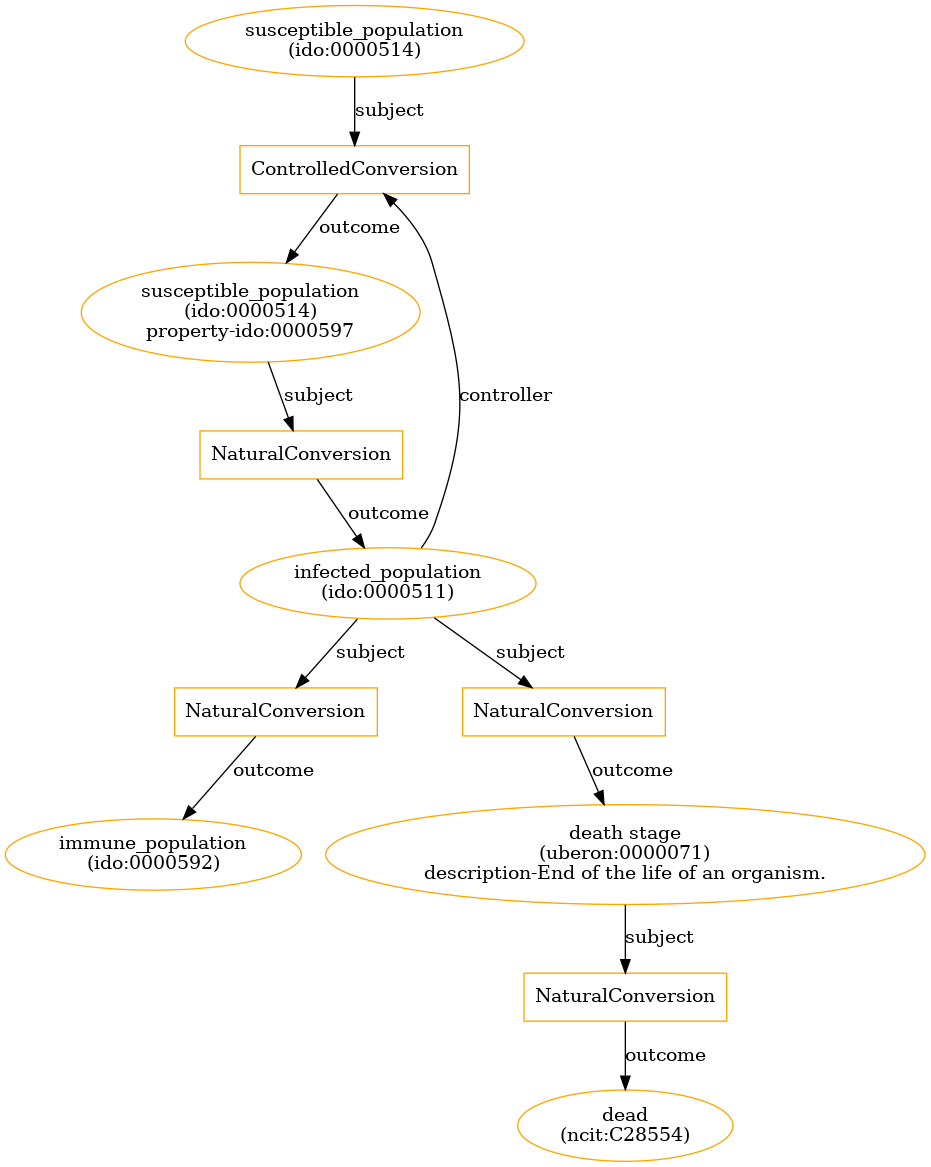

In [8]:
seird.draw_graph('mech_bayes_seird.png')
Image("mech_bayes_seird.png", width=75)

## Add hospitalization

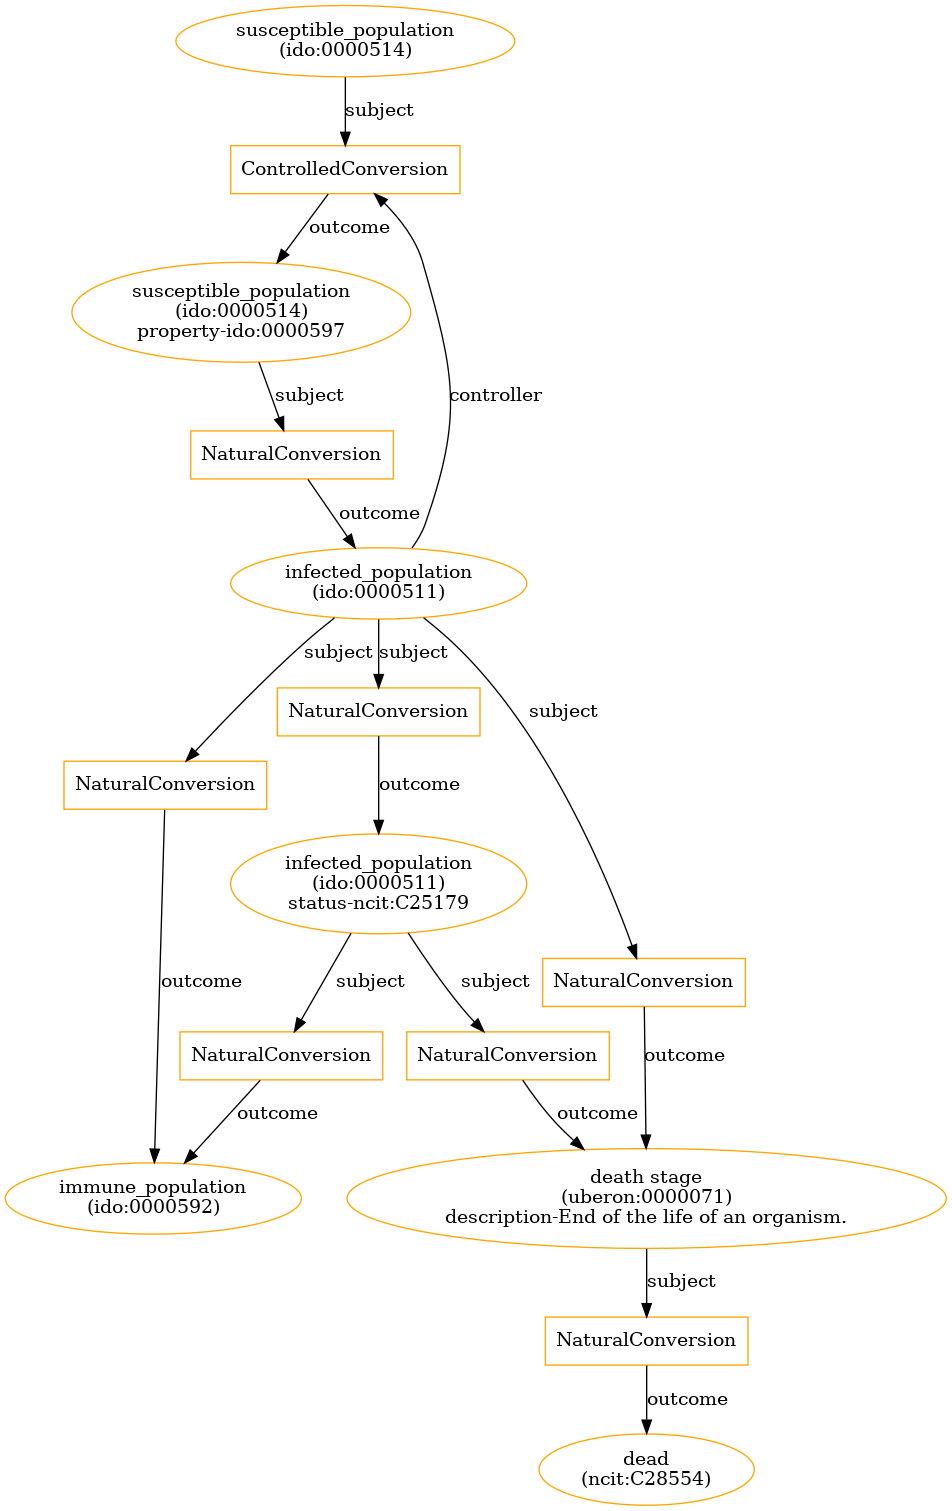

In [9]:
from mira.examples.mech_bayes import dying
from mira.metamodel import NaturalConversion, TemplateModel
from mira.examples.concepts import infected, recovered

# Add a NaturalConversion: infected -> hospitalized; NaturalConversion: hospitalized -> recovered; NaturalConversion: hospitalized -> dying;
# ncit:C25179 = Hospitalization
hospitalized = infected.with_context(status="ncit:C25179")
hospitalization = NaturalConversion(subject=infected, outcome=hospitalized)
recovery_from_hospitalization = NaturalConversion(subject=hospitalized, outcome=recovered)
dying_from_hospitalization = NaturalConversion(subject=hospitalized, outcome=dying)
hospitalization_mmt = TemplateModel(templates=[hospitalization, recovery_from_hospitalization, dying_from_hospitalization])
seirhd = seird.extend(template_model=hospitalization_mmt)

seirhd.draw_graph('seihrd.png')
Image('seihrd.png', width=75)

## Remove the exposed
Just make a new template model since there is no delete method yet

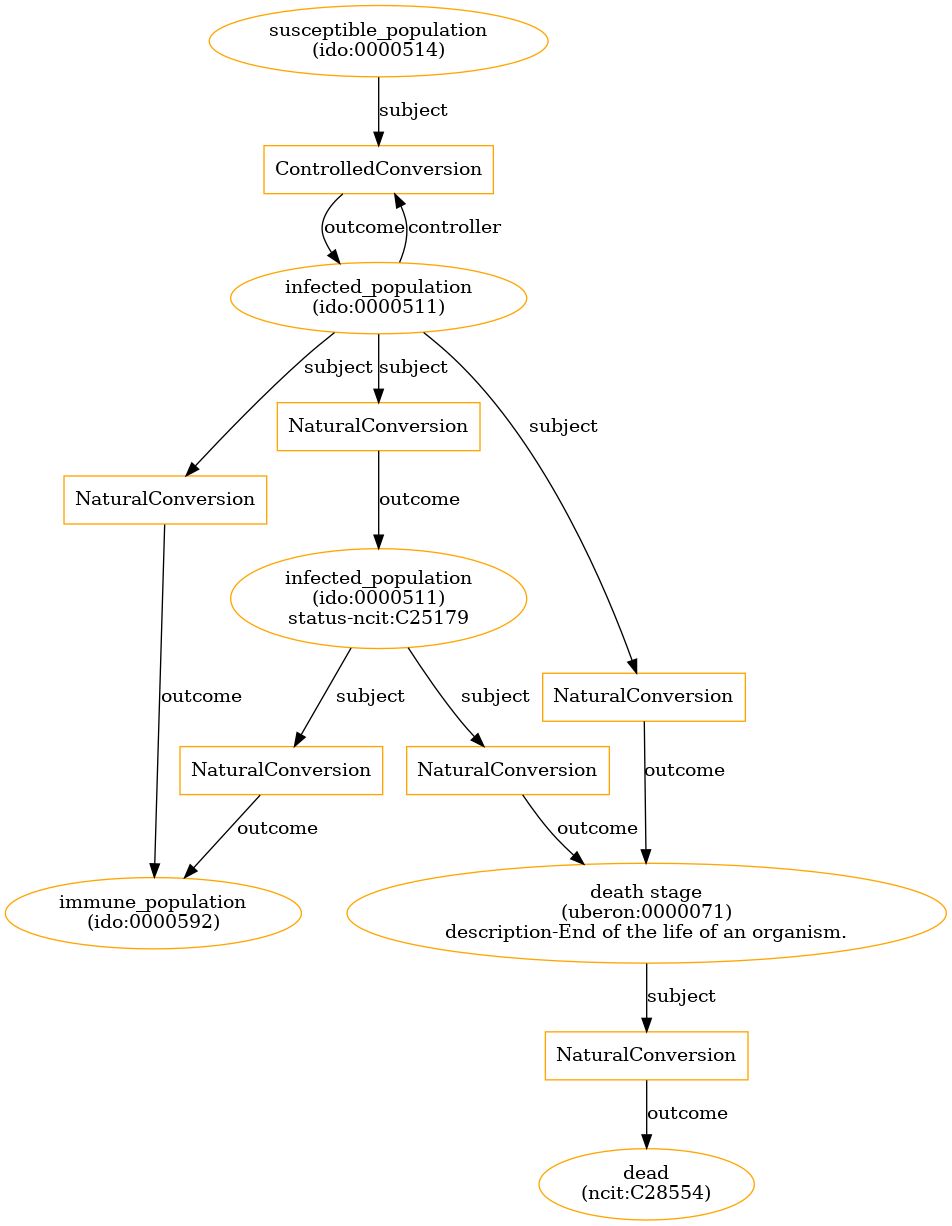

In [11]:
from mira.metamodel import ControlledConversion
from mira.examples.mech_bayes import susceptible, infected, recovery, dying_to_death, dying_process

susceptible_to_infected = ControlledConversion(subject=susceptible, controller=infected, outcome=infected)
sirhd = TemplateModel(
  templates=[
    susceptible_to_infected,        # S->I
    recovery,                       # I->R
    hospitalization,                # I->H
    recovery_from_hospitalization,  # H->R
    dying_from_hospitalization,     # H->D1
    dying_process,                  # I->D1
    dying_to_death                  # D1->D2
  ]
)
sirhd.draw_graph('sirhd.png')
Image('sirhd.png')